## Инициализация

### Импорт библиотек

In [51]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil as psutil
import time
from matplotlib import cm

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

#### Константы

In [52]:
x_from = 0
x_to = 30
step = 0.25

### Вспомогательные функции

In [53]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

#### Функция

In [54]:
def f(x):
    return 3 + x


#### Генераторы регрессий

In [55]:
def linear_regression_func(x, w):
    return sum([(x ** i) * w[i] for i in range(len(w))])

def generate_sample(total):
    x = 0
    
    while x < total * step:
        yield f(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 9)
        x += step

#### 3D визуализация функции

In [56]:
def print_f(x0, X, Y, Z, elev=30, azim=60):
  # Создание фигуры и трехмерной оси
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Установка угол обзора
  ax.view_init(elev=elev, azim=azim)

  # Построение поверхности
  ax.plot_surface(X, Y, Z)

  # Построение начальной точки
  # ax.plot(x0[0], x0[1], get_sum_linear(X, Y, x0), 'ro', label='Начальная точка')

  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  plt.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  plt.title('График функции c начальной точкой')
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

  # Отображение графика
  plt.show()

#### Линии уровня и градиент

In [57]:
def print_lines_grad(X, Y, Z, xs, ys, list_result, list_label, title='Градиентный спуск на уровнях функции', filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  for i in range(len(list_result)):
    levels = np.unique(sorted([get_sum_linear(xs, ys, w) for w in list_result[i]]))
    cs = ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)
    cs.clabel()

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    # print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  # Добавление легенды
  if len(list_label) > 0:
    plt.legend(loc='upper left')

  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)    

  plt.show()

#### 3D визуализация градиента

In [58]:
def print_full_grad(X, Y, Z, xs, ys, list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024, isshow=True):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.array([get_sum_linear(xs, ys, w) for w in list_result[i]])
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    # print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  if len(list_label) > 0:
    ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

## Реализация

In [59]:
# TODO: возможно стоит объединить MSE_{linear, polynomial} и get_sum_{linear, polynomial}

def MSE_linear(x, y, w):
    return [(y[i] - w.dot(x[i])) ** 2 for i in range(len(x))] # TODO: возможно нужен свободный член

def MSE_polynomial(x, y, w):
    return [(y[i] - sum([(x[i] ** j) * w[j] for j in range(len(w))])) ** 2 for i in range(len(x))]

def get_sum_linear(x, y, w):
    return (1/len(x)) * sum(MSE_linear(x, y, w))

def get_sum_polynomial(x, y, w):
    return (1/len(x)) * sum(MSE_polynomial(x, y, w))

def get_grad_linear(x, y, w):
    return -2 * (y - w.dot(x)) * x[1]

def get_grad_polynomial(x, y, w, size): # TODO: pows
    pows = np.array([x ** i for i in range(size)])
    return np.array([-2 * (y[i] - w.dot(x)) * pows[i] for i in range(size)])

## Задание 2.
### Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость, например экспоненциальную или ступенчатую.

In [103]:
def exp_decay(epoch, k, initial_lrate=0.3):
   return initial_lrate * math.exp(-k * epoch)

def const_decay(epoch, k, initial_lrate=0.3):
   return initial_lrate

## Задание 1.
### Реализуйте стохастический градиентный спуск для решения линейной регрес- сии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, .., n − 1 - Minibatch GD, n - GD из предыдущей работы).

### SGD без модификаций.

In [104]:
def sth_gradient(xs, ys, w, lr, batch_size, epochs):
    cur_w = np.copy(w)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0
    
    for epoch in range(epochs):
        grad = np.zeros(len(w), dtype=float)
        
        if pos + batch_size - 1 >= cnt_dots:
            pos = 0
            random.shuffle(perm)

        for j in range(pos, pos + batch_size):
            grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

        pos += batch_size
        grad //= batch_size
        cur_w = cur_w - lr(epoch, ba) * grad

        points = np.vstack([points, cur_w])
        
    return points

## Задание 3.
### Исследуйте модификации градиентного спуска (Nesterov, Momentum, AdaGrad, RMSProp, Adam).

### SGD with Momentum

In [105]:
def momentum_gradient(xs, ys, w, lr, batch_size, epochs):
    def momentum(cur_w, cur_momentum, grad, gamma, lr):
        next_momentum = gamma * cur_momentum + (1 - gamma) * grad
        next_w = cur_w - lr * cur_momentum
        return next_w, next_momentum
    
    cur_w = np.copy(w)
    cur_momentum = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        grad = np.zeros(len(w), dtype=float)
        
        if pos + batch_size - 1 >= cnt_dots:
            pos = 0
            random.shuffle(perm)

        for j in range(pos, pos + batch_size):
            grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

        pos += batch_size
        grad //= batch_size
        cur_w, cur_momentum = momentum(cur_w, cur_momentum, grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points

### Nesterov SGD

In [106]:
def nesterov_gradient(xs, ys, w, lr, batch_size, epochs):
    def nesterov(cur_w, cur_momentum, grad, gamma, lr):
        next_momentum = gamma * cur_momentum + (1 - gamma) * grad
        next_w = cur_w - lr * next_momentum
        return next_w, next_momentum
    
    cur_w = np.copy(w)
    cur_nesterov = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        grad = np.zeros(len(w), dtype=float)

        if pos + batch_size - 1 >= cnt_dots:
            pos = 0
            random.shuffle(perm)

        for j in range(pos, pos + batch_size):
            grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w - lr(epoch, batch_size) * 0.9 * cur_nesterov)

        pos += batch_size
        grad //= batch_size
        cur_w, cur_nesterov = nesterov(cur_w, cur_nesterov, grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])

    return points

### AdaGrad

In [107]:
def ada_grad_gradient(xs, ys, w, lr, batch_size, epochs):
    def ada_grad(cur_w, cur_grad, grad, lr):
        new_grad = cur_grad + np.square(-grad)
        new_w = cur_w + lr * np.divide(grad, np.sqrt(new_grad))
        return new_w, new_grad
    
    cur_w = np.copy(w)
    cur_ada_grad = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0
    
    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)

            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_ada_grad = ada_grad(cur_w, cur_ada_grad, -grad, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])

    return points

### RMSProp

In [108]:
def rms_prop_gradient(xs, ys, w, lr, batch_size, epochs):
    def rms_prop(cur_w, cur_grad, grad, gamma, lr, eps=1e-6):
        new_grad = gamma * cur_grad + (1 - gamma) * np.square(-grad)
        new_w = cur_w + lr * np.divide(grad, np.sqrt(new_grad) + eps)
        
        return new_w, new_grad
    
    cur_w = np.copy(w)
    cur_prop_grad = np.zeros(len(w), dtype=float)
    cnt_dots = len(xs)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)
            print(grad)
            
            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_prop_grad = rms_prop(cur_w, cur_prop_grad, -grad, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points

### Adam SGD

In [109]:
def adam_gradient(xs, ys, w, lr, batch_size, epochs):
    def adam(cur_w, cur_momentum, cur_grad, grad, beta, gamma, lr, eps=1e-6):
        new_momentum = beta * cur_momentum + (1 - beta) * grad
        new_grad = gamma * cur_grad + (1 - gamma) * np.square(grad)
        new_w = cur_w - lr * np.divide(new_momentum, np.sqrt(new_grad) + eps)

        return new_w, new_momentum, new_grad
        
    cur_w = np.copy(w)
    cnt_dots = len(xs)
    cur_prop_grad = np.zeros(len(w), dtype=float)
    cur_momentum = np.zeros(len(w), dtype=float)
    perm = list(range(cnt_dots))
    random.shuffle(perm)
    points = np.array([cur_w])
    pos = 0

    for epoch in range(epochs):
        for _ in range(cnt_dots // batch_size):
            grad = np.zeros(len(w), dtype=float)

            if pos + batch_size - 1 >= cnt_dots:
                pos = 0
                random.shuffle(perm)

            for j in range(pos, pos + batch_size):
                grad += get_grad_linear(xs[perm[j]], ys[perm[j]], cur_w)

            pos += batch_size
            grad //= batch_size
            cur_w, cur_momentum, cur_prop_grad = adam(cur_w, cur_momentum, cur_prop_grad, grad, 0.9, 0.9, lr(epoch, batch_size))

        points = np.vstack([points, cur_w])
        
    return points

## Дополнительное задание

In [110]:
def f_poly(x):
    5 + x[0] ** 2

## Тестирование

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


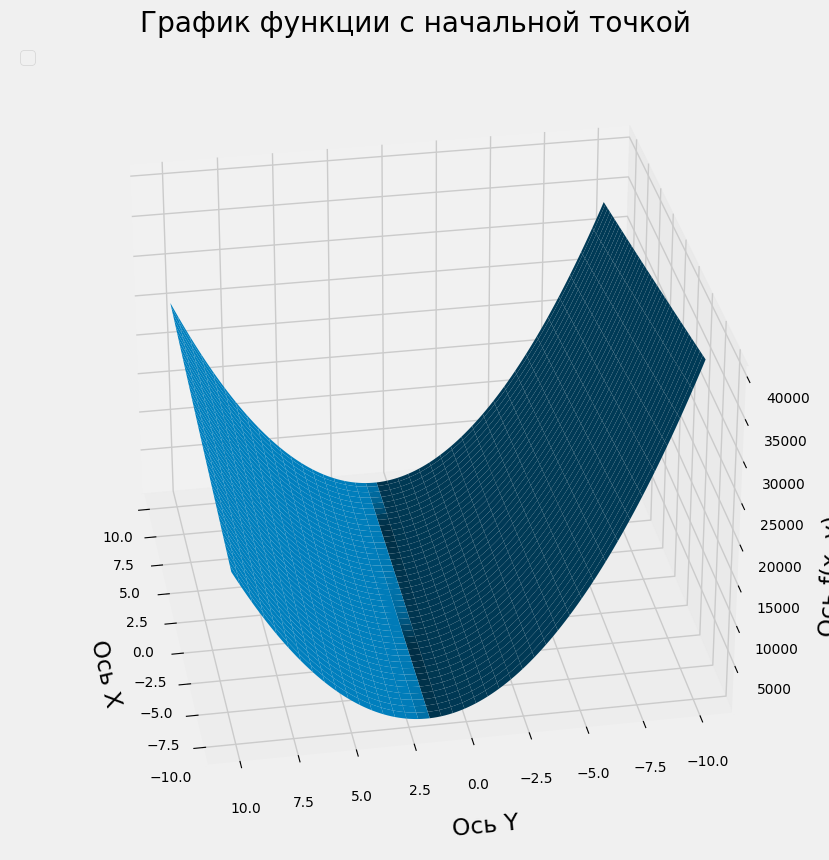

In [111]:
x0 = np.array([1, 1])

X = np.array([np.array([1, x]) for x in np.arange(x_from, x_to, step)]) 
Y = np.array([round(y, 2) for y in generate_sample(len(X))]) # эксперементальные даннные

Y_real = np.array([f(x) for x in X])

xl = np.linspace(-10, 10, 120)
yl = np.linspace(-10, 10, 120)
XL, YL = np.meshgrid(xl, yl)

Z = np.array([[get_sum_linear(X, Y, np.array([m, b])) for m, b in zip(m_row, b_row)]
              for m_row, b_row in zip(XL, YL)])

print_f(x0, XL, YL, Z, azim=170)

/var/folders/4p/swz4slj93c12sxzsg1nthxyw0000gn/T/ipykernel_20412/1686381767.py:16: RuntimeWarning: overflow encountered in double_scalars
  return -2 * (y - w.dot(x)) * x[1]
/var/folders/4p/swz4slj93c12sxzsg1nthxyw0000gn/T/ipykernel_20412/1686381767.py:4: RuntimeWarning: overflow encountered in double_scalars
  return [(y[i] - w.dot(x[i])) ** 2 for i in range(len(x))] # TODO: возможно нужен свободный член
/var/folders/4p/swz4slj93c12sxzsg1nthxyw0000gn/T/ipykernel_20412/1686381767.py:10: RuntimeWarning: overflow encountered in double_scalars
  return (1/len(x)) * sum(MSE_linear(x, y, w))
/Users/mac/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


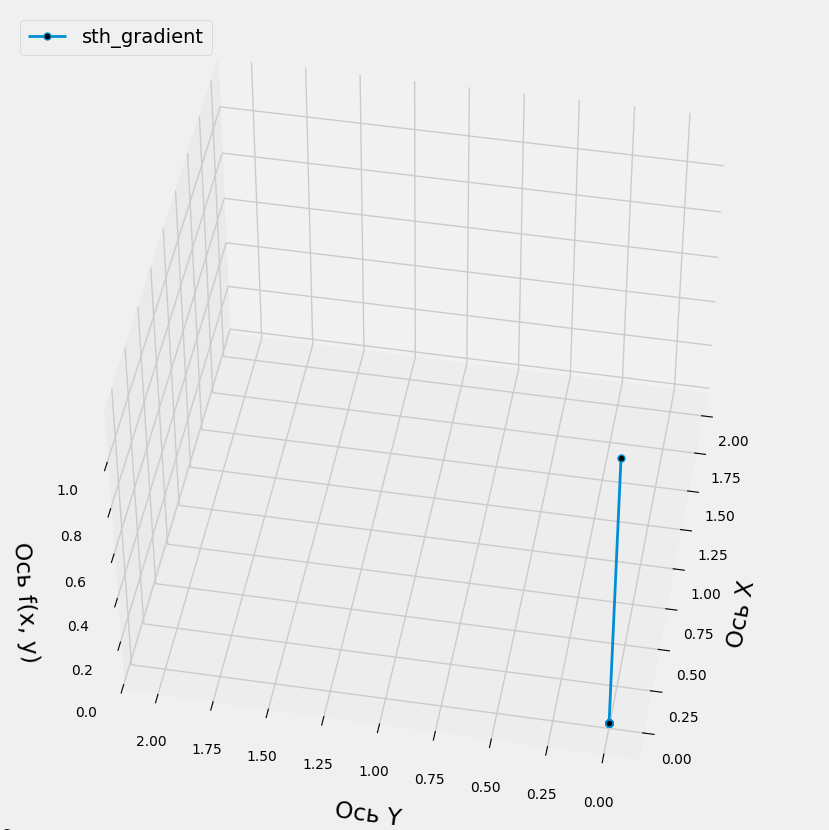

ValueError: cannot convert float NaN to integer

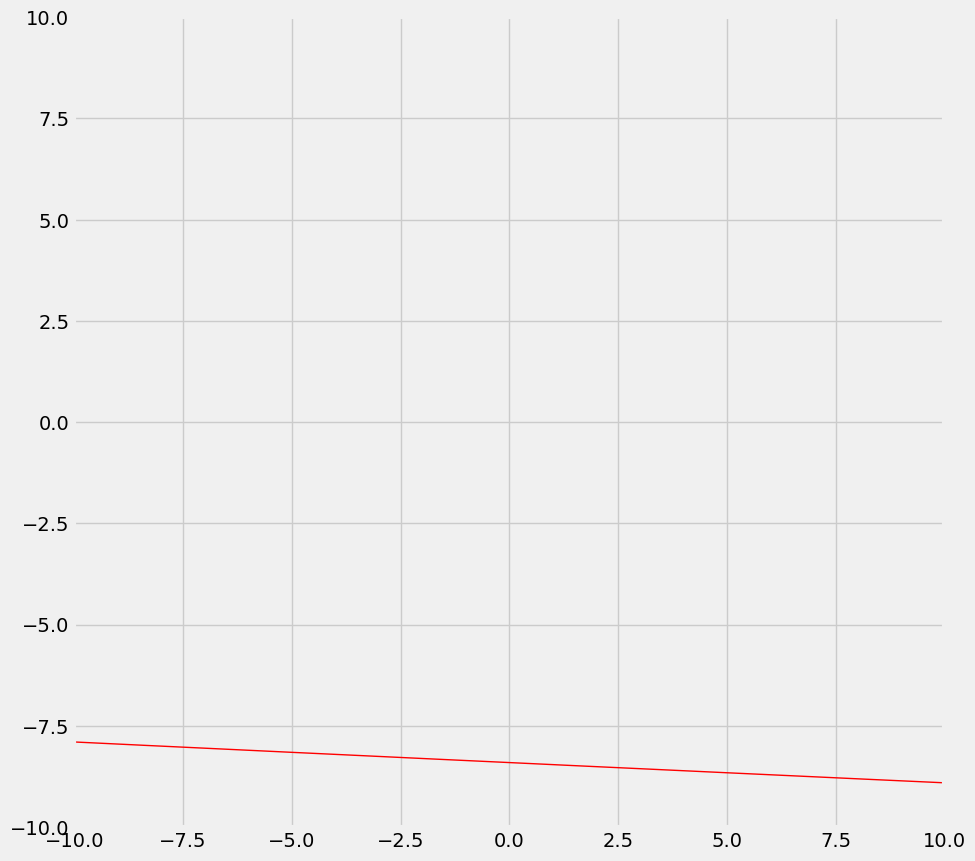

In [112]:
x0 = np.array([-8, -8])

result = [sth_gradient(list(X), list(Y), x0, const_decay, 5, 500)]

result_label = ['sth_gradient']

print_full_grad(XL, YL, Z, X, Y, result, result_label, title='', elev=45, azim=-170)
print_lines_grad(XL, YL, Z, X, Y, result, result_label, title='')

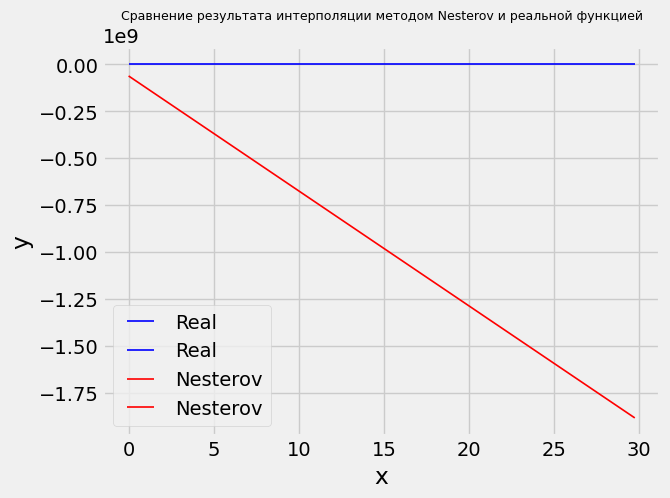

In [ ]:
ans_w = result[0][-1]
Y_real = np.array([f(x) for x in X])
Y_nesterov = np.array([linear_regression_func(x, ans_w) for x in X])

plt.plot(X, Y_real, color='blue', label='Real', linewidth=1.2)
plt.plot(X, Y_nesterov, color='red', label='Nesterov', linewidth=1.2)

plt.title('Сравнение результата интерполяции методом Nesterov и реальной функцией', fontsize=9)
plt.xlabel('x')
plt.ylabel('y')

plt.legend(numpoints = 2)
plt.show()


In [ ]:
# test1 = adam_gradient(list(X), list(Y), w_start, exp_decay, 1, 50)
# print(test1[0][0], '+', str(test1[0][1]) + " * x", test1[1])

# test2 = sth_gradient(list(X), list(Y), w_start, stage_lr, 1, 10 ** 5)
# print(test2[0][0], '+', str(test2[0][1]) + " * x", test2[1])

# test3 = sth_gradient(list(X), list(Y), w_start, exp_lr, 1, 10 ** 5)
# print(test3[0][0], '+', str(test3[0][1]) + " * x", test3[1])

# test_momentum = momentum_gradient(list(X), list(Y), w_start, const_lr, 1, 10 ** 5)
# print(test_momentum[0][0], '+', str(test_momentum[0][1]) + " * x", test_momentum[1])

# test_nesterov = nesterov_gradient(list(X), list(Y), w_start, const_lr, 1, 10 ** 5)
# print(test_nesterov[0][0], '+', str(test_nesterov[0][1]) + " * x", test_nesterov[1])

# test_ada_grad = ada_grad_gradient(list(X), list(Y), w_start, const_lr, 1, 10 ** 4)
# print(test_ada_grad[0][0], '+', str(test_ada_grad[0][1]) + " * x", test_ada_grad[1])

# test_prop_grad = rms_prop_gradient(list(X), list(Y), w_start, const_lr, 1, 10)
# print(test_prop_grad[0][0], '+', str(test_prop_grad[0][1]) + " * x", test_prop_grad[1])

# Y_current = np.array([linear_regression_func(x, test1[0]) for x in X])
# plt.plot(X, Y_current, 'b', linewidth=2.0)

# print(psutil.virtual_memory())
# end = time.time()
# print("время ", end - start)

w_start = np.array([1, 1])
result = adam_gradient(list(X), list(Y), w_start, exp_decay, 1, 50)

# ax = plt.subplot()

# points = np.array(test1[2])
# print(points)
#print(Z)
# ax.plot(points[:, 0], points[:, 1], 'o-')
# ax.grid()
# ax.contour(X, Y, Z,  levels=sorted([MSE([p[0]], [p[1]], test1[0])[0] for p in points]))
# plt.show()